In [237]:
#File setup: Data import and cleaning

Acquire the training and testing data

In [160]:
#PACKAGE IMPORT
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import requests
from datetime import datetime

pd.set_option('display.max_columns', None)


# define function to convert to hourly time 
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0


In [161]:
pd.set_option('display.max_columns', None)

In [162]:
acc = pd.read_csv('/Users/DREW/Desktop/dft-accident-data/Acc.csv', dtype={'Accident_Index': str})

In [163]:
acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863


In [165]:
acc.columns.tolist()

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

In [166]:
keeps = ['Accident_Index',
         'Accident_Severity',
         'Number_of_Vehicles',
         'Number_of_Casualties',
         'Date',
         'Day_of_Week',
         'Time',
         'Road_Surface_Conditions',
         'Road_Type',
         'Speed_limit',
         'Junction_Detail',
         'Junction_Control',
         'Pedestrian_Crossing-Physical_Facilities',
         'Light_Conditions',
         'Weather_Conditions',
         'Urban_or_Rural_Area',
         'Did_Police_Officer_Attend_Scene_of_Accident',
         ]
acc.drop([c for c in acc.columns if c not in keeps], axis = 1, inplace = True)


In [167]:
acc.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00001,2,1,1,04/01/2005,3,17:42,6,30,0,-1,1,1,2,2,1,1
1,200501BS00002,3,1,1,05/01/2005,4,17:36,3,30,6,2,5,4,1,1,1,1
2,200501BS00003,3,2,1,06/01/2005,5,00:15,6,30,0,-1,0,4,1,1,1,1
3,200501BS00004,3,1,1,07/01/2005,6,10:35,6,30,0,-1,0,1,1,1,1,1
4,200501BS00005,3,1,1,10/01/2005,2,21:13,6,30,0,-1,0,7,1,2,1,1


In [168]:
cas = pd.read_csv('/Users/DREW/Desktop/dft-accident-data/Cas.csv', dtype={'Accident_Index': str}, quoting=3, error_bad_lines=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [169]:
cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [170]:
cas.columns.tolist()

['Accident_Index',
 'Vehicle_Reference',
 'Casualty_Reference',
 'Casualty_Class',
 'Sex_of_Casualty',
 'Age_of_Casualty',
 'Age_Band_of_Casualty',
 'Casualty_Severity',
 'Pedestrian_Location',
 'Pedestrian_Movement',
 'Car_Passenger',
 'Bus_or_Coach_Passenger',
 'Pedestrian_Road_Maintenance_Worker',
 'Casualty_Type',
 'Casualty_Home_Area_Type']

In [171]:
keeps = ['Accident_Index',
         'Vehicle_Reference',
         'Casualty_Class',
         'Sex_of_Casualty',
         'Age_of_Casualty',
         'Casualty_Severity',
         'Pedestrian_Location',
         'Pedestrian_Movement',
         'Casualty_Type',
         ]
cas.drop([c for c in cas.columns if c not in keeps], axis = 1, inplace = True)
cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Casualty_Type
0,200501BS00001,1,3,1,37,2,1,1,0
1,200501BS00002,1,2,1,37,3,0,0,11
2,200501BS00003,2,1,1,62,3,0,0,9
3,200501BS00004,1,3,1,30,3,5,2,0
4,200501BS00005,1,1,1,49,3,0,0,3


In [172]:
veh = pd.read_csv('/Users/DREW/Desktop/dft-accident-data/Veh.csv', dtype={'Accident_Index': str}, quoting=3, error_bad_lines=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [173]:
veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,0,3,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,0,1,1,15,2,49,8,1769,1,4,2,1


In [174]:
veh.columns.tolist()

['Accident_Index',
 'Vehicle_Reference',
 'Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Was_Vehicle_Left_Hand_Drive?',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Engine_Capacity_(CC)',
 'Propulsion_Code',
 'Age_of_Vehicle',
 'Driver_IMD_Decile',
 'Driver_Home_Area_Type']

In [175]:
keeps = ['Accident_Index',
         'Vehicle_Reference',
         'Vehicle_Type',
         'Vehicle_Manoeuvre',
         '1st_Point_of_Impact',
         'Journey_Purpose_of_Driver',
         'Sex_of_Driver',
         'Age_of_Driver',
         'Age_of_Vehicle',
         ]
veh.drop([c for c in veh.columns if c not in keeps], axis = 1, inplace = True)
veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,200501BS00001,1,9,18,1,15,2,74,-1
1,200501BS00002,1,11,4,4,1,1,42,3
2,200501BS00003,1,11,17,4,1,1,35,5
3,200501BS00003,2,9,2,3,15,1,62,6
4,200501BS00004,1,9,18,1,15,2,49,4


In [176]:
print (acc.shape)
print (cas.shape)
print (veh.shape)

(1780653, 17)
(2216720, 9)
(3004425, 9)


In [177]:
print (acc['Accident_Index'].nunique())
print (cas['Accident_Index'].nunique())
print (veh['Accident_Index'].nunique())

1780653
1640597
1640597


In [178]:
cas_and_veh = pd.merge(left=cas, right=veh,
                      on=['Accident_Index', 'Vehicle_Reference'],
                     how='outer', copy=False)
cas_and_veh.shape

(3361350, 16)

In [179]:
acc.columns

Index(['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [182]:
cas_and_veh.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Class',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Location', 'Pedestrian_Movement', 'Casualty_Type',
       'Vehicle_Type', 'Vehicle_Manoeuvre', '1st_Point_of_Impact',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_of_Vehicle'],
      dtype='object')

In [185]:
allm = pd.merge(left=acc, right=cas_and_veh, how='outer',
             on='Accident_Index', copy=False)

In [186]:
allm['Accident_Index'].nunique()

1780653

In [187]:
allm.columns

Index(['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Casualty_Type', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       '1st_Point_of_Impact', 'Journey_Purpose_of_Driver', 'Sex_of_Driver',
       'Age_of_Driver', 'Age_of_Vehicle'],
      dtype='object')

In [188]:
allm.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Casualty_Type,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,200501BS00001,2,1,1,04/01/2005,3,17:42,6,30,0,-1,1,1,2,2,1,1,1.0,3.0,1.0,37.0,2.0,1.0,1.0,0.0,9.0,18.0,1.0,15.0,2.0,74.0,-1.0
1,200501BS00002,3,1,1,05/01/2005,4,17:36,3,30,6,2,5,4,1,1,1,1,1.0,2.0,1.0,37.0,3.0,0.0,0.0,11.0,11.0,4.0,4.0,1.0,1.0,42.0,3.0
2,200501BS00003,3,2,1,06/01/2005,5,00:15,6,30,0,-1,0,4,1,1,1,1,2.0,1.0,1.0,62.0,3.0,0.0,0.0,9.0,9.0,2.0,3.0,15.0,1.0,62.0,6.0
3,200501BS00003,3,2,1,06/01/2005,5,00:15,6,30,0,-1,0,4,1,1,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,17.0,4.0,1.0,1.0,35.0,5.0
4,200501BS00004,3,1,1,07/01/2005,6,10:35,6,30,0,-1,0,1,1,1,1,1,1.0,3.0,1.0,30.0,3.0,5.0,2.0,0.0,9.0,18.0,1.0,15.0,2.0,49.0,4.0


In [189]:
allm.to_csv('/Users/DREW/Desktop/dft-accident-data/merged_dataset.csv')

In [190]:
os.getcwd()

'/Users/DREW/Desktop/I.T/ML/Untitled Folder 1/DATA'

In [191]:
allm.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Casualty_Type,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,200501BS00001,2,1,1,04/01/2005,3,17:42,6,30,0,-1,1,1,2,2,1,1,1.0,3.0,1.0,37.0,2.0,1.0,1.0,0.0,9.0,18.0,1.0,15.0,2.0,74.0,-1.0
1,200501BS00002,3,1,1,05/01/2005,4,17:36,3,30,6,2,5,4,1,1,1,1,1.0,2.0,1.0,37.0,3.0,0.0,0.0,11.0,11.0,4.0,4.0,1.0,1.0,42.0,3.0
2,200501BS00003,3,2,1,06/01/2005,5,00:15,6,30,0,-1,0,4,1,1,1,1,2.0,1.0,1.0,62.0,3.0,0.0,0.0,9.0,9.0,2.0,3.0,15.0,1.0,62.0,6.0
3,200501BS00003,3,2,1,06/01/2005,5,00:15,6,30,0,-1,0,4,1,1,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,17.0,4.0,1.0,1.0,35.0,5.0
4,200501BS00004,3,1,1,07/01/2005,6,10:35,6,30,0,-1,0,1,1,1,1,1,1.0,3.0,1.0,30.0,3.0,5.0,2.0,0.0,9.0,18.0,1.0,15.0,2.0,49.0,4.0


In [192]:
df = pd.read_csv('/Users/DREW/Desktop/dft-accident-data/merged_dataset.csv', dtype={'Accident_Index':str})

In [193]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Road_Type',
       'Speed_limit', 'Junction_Detail', 'Junction_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement',
       'Casualty_Type', 'Vehicle_Type', 'Vehicle_Manoeuvre',
       '1st_Point_of_Impact', 'Journey_Purpose_of_Driver', 'Sex_of_Driver',
       'Age_of_Driver', 'Age_of_Vehicle'],
      dtype='object')

In [244]:
# To find the total number of accidents in each days of the week
allm = Accident_days_count.groupby(['label' ])['Accident_Index'].count().reset_index()
allm = Accident_days_count.sort_values('Accident_Index', ascending = False).reset_index(drop=1)

NameError: name 'Accident_days_count' is not defined

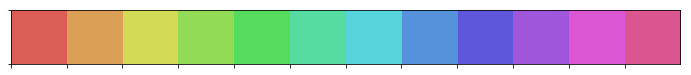

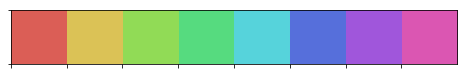

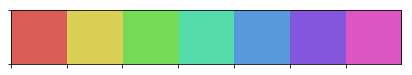

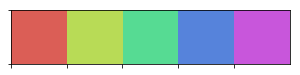

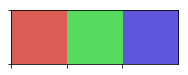

In [220]:
# create color palette with 12 colors (for use with monthly data)
twelveColorPalette = sns.color_palette('hls', 12)
twelve = sns.palplot(twelveColorPalette)
plt.savefig('/Users/DREW/Desktop/I.T/ML/Untitled Folder 1/TrafikiPy-master/Images/twelveColorPalette.png')

# create color palette with 8 colors (for use with weather conditions)
eightColorPalette = sns.color_palette('hls', 8)
eight = sns.palplot(eightColorPalette)
plt.savefig('/Users/DREW/Desktop/I.T/ML/Untitled Folder 1/TrafikiPy-master/Images/eightColorPalette.png')

# create color palette with 7 colors (for use with day of the week analysis)
sevenColorPalette = sns.color_palette('hls', 7)
seven = sns.palplot(sevenColorPalette)
plt.savefig('/Users/DREW/Desktop/I.T/ML/Untitled Folder 1/TrafikiPy-master/Images/sevenColorPalette.png')

# create color palette with 5 colors (for use with road/light conditions)
fiveColorPalette = sns.color_palette('hls', 5)
five = sns.palplot(fiveColorPalette)
plt.savefig('/Users/DREW/Desktop/I.T/ML/Untitled Folder 1/TrafikiPy-master/Images/fiveColorPalette.png')

# create color palette with 3 colors (for data by severity)
threeColorPalette = sns.color_palette('hls', 3)
three = sns.palplot(threeColorPalette)
plt.savefig('/Users/DREW/Desktop/I.T/ML/Untitled Folder 1/TrafikiPy-master/Images/threeColorPalette.png')

# display color palettes
plt.show(three)
plt.show(five)
plt.show(seven)
plt.show(eight)
plt.show(twelve)

---

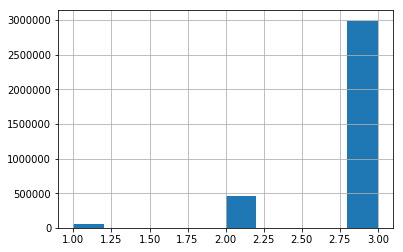

In [221]:
df['Accident_Severity'].hist()
# 1 - Fatal, 2 - Serious, 3 - Slight

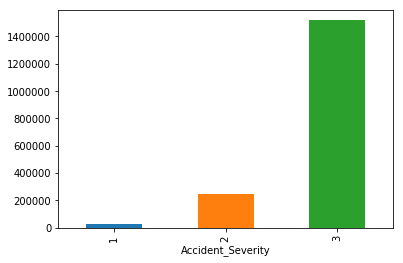

In [222]:
acc_count = acc.groupby(acc.Accident_Severity).Accident_Severity.count().plot(kind = 'bar')

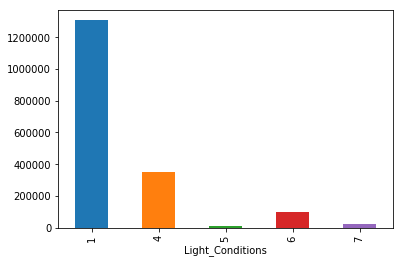

In [223]:
acc_count = acc.groupby(acc.Light_Conditions).Accident_Severity.count().plot(kind = 'bar')

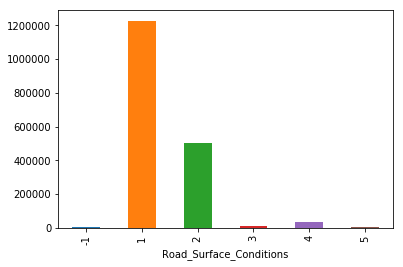

In [224]:
acc_count = acc.groupby(acc.Road_Surface_Conditions).Accident_Severity.count().plot(kind = 'bar')

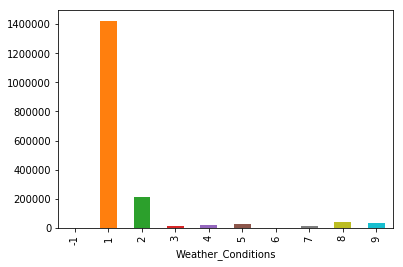

In [225]:
acc_count = acc.groupby(acc.Weather_Conditions).Accident_Severity.count().plot(kind = 'bar')

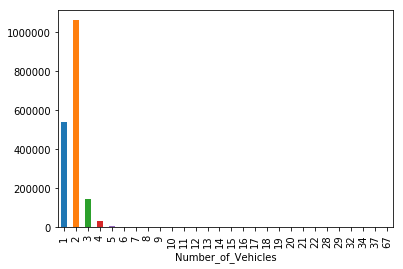

In [226]:
acc.groupby(acc.Number_of_Vehicles).Accident_Severity.count().plot(kind = 'bar')

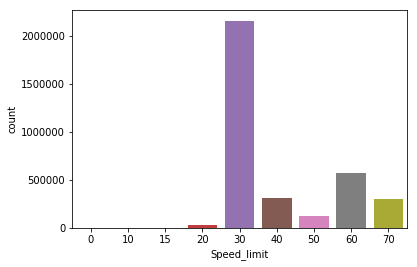

In [227]:
sns.countplot(df['Speed_limit'])

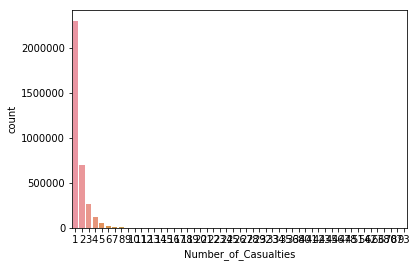

In [228]:
sns.countplot(df['Number_of_Casualties'])

In [229]:
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

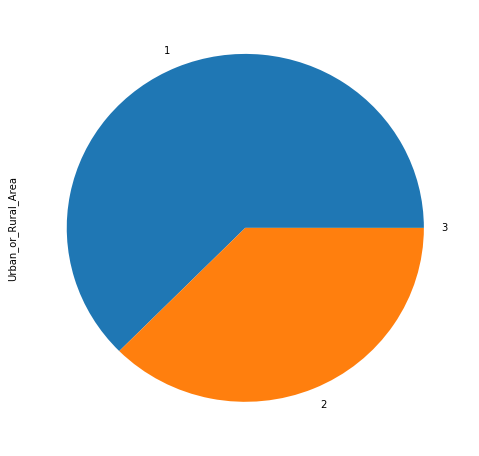

In [230]:
UrbanRural = all_merged['Urban_or_Rural_Area'].value_counts()
UrbanRural.plot.pie(figsize=(8,8))
plt.show()

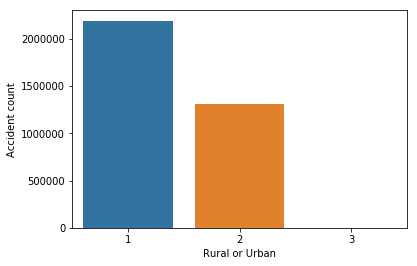

In [231]:
sns.barplot(x=UrbanRural.index, y=UrbanRural.values)
plt.xlabel('Rural or Urban')
plt.ylabel('Accident count')
plt.show()

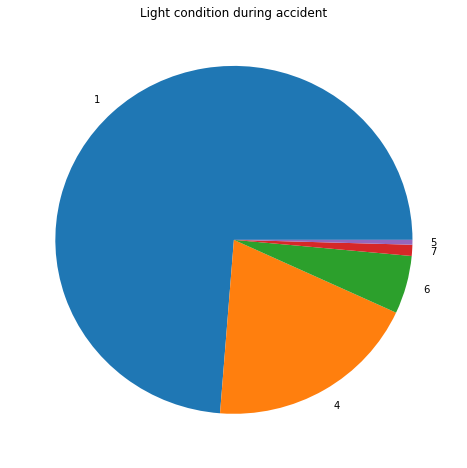

In [232]:
lightCondition = all_merged['Light_Conditions'].value_counts()
lightCondition.plot.pie(figsize=(8,8))
plt.title('Light condition during accident')
plt.ylabel('')
plt.show()

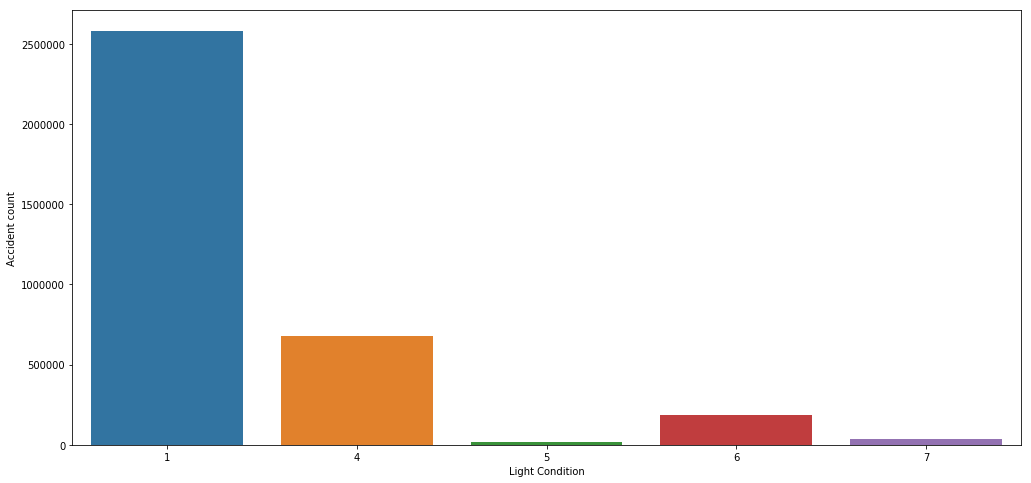

In [233]:
f, ax = plt.subplots(figsize=(17,8))
sns.barplot(x=lightCondition.index, y=lightCondition.values,ax=ax)
plt.xlabel('Light Condition')
plt.ylabel('Accident count')
plt.show()

In [234]:
allm.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Detail,Junction_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Casualty_Type,Vehicle_Type,Vehicle_Manoeuvre,1st_Point_of_Impact,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle
0,200501BS00001,2,1,1,04/01/2005,3,17:42,6,30,0,-1,1,1,2,2,1,1,1.0,3.0,1.0,37.0,2.0,1.0,1.0,0.0,9.0,18.0,1.0,15.0,2.0,74.0,-1.0
1,200501BS00002,3,1,1,05/01/2005,4,17:36,3,30,6,2,5,4,1,1,1,1,1.0,2.0,1.0,37.0,3.0,0.0,0.0,11.0,11.0,4.0,4.0,1.0,1.0,42.0,3.0
2,200501BS00003,3,2,1,06/01/2005,5,00:15,6,30,0,-1,0,4,1,1,1,1,2.0,1.0,1.0,62.0,3.0,0.0,0.0,9.0,9.0,2.0,3.0,15.0,1.0,62.0,6.0
3,200501BS00003,3,2,1,06/01/2005,5,00:15,6,30,0,-1,0,4,1,1,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,17.0,4.0,1.0,1.0,35.0,5.0
4,200501BS00004,3,1,1,07/01/2005,6,10:35,6,30,0,-1,0,1,1,1,1,1,1.0,3.0,1.0,30.0,3.0,5.0,2.0,0.0,9.0,18.0,1.0,15.0,2.0,49.0,4.0


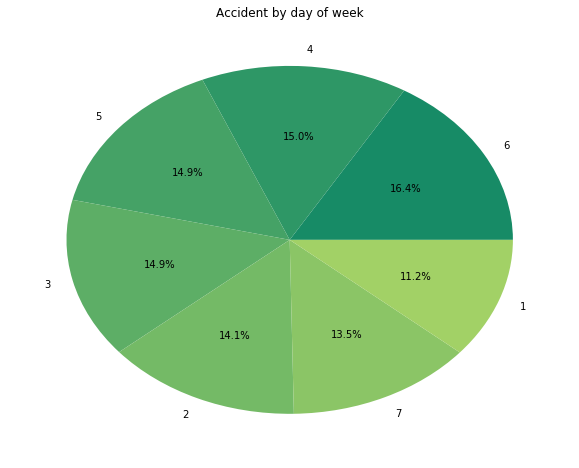

In [235]:
f,ax= plt.subplots(figsize=(10,8))
Doweek = allm['Day_of_Week'].dropna().value_counts()
Doweek.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('summer',10))
plt.title('Accident by day of week')
plt.ylabel('')
plt.show()

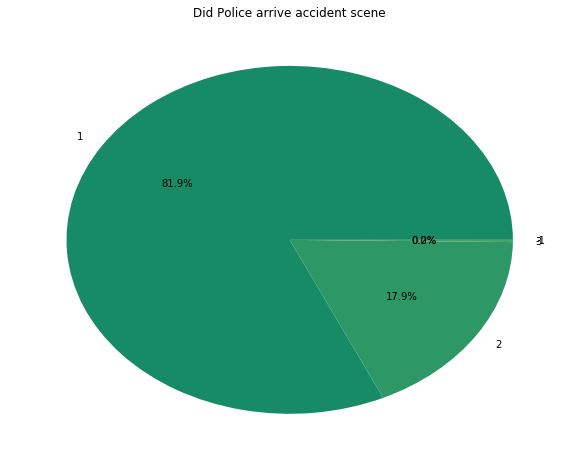

In [236]:
plt.subplots(figsize=(10,8))
PArrive=allm['Did_Police_Officer_Attend_Scene_of_Accident'].dropna().value_counts()
PArrive.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('summer',10))
plt.ylabel('')
plt.title('Did Police arrive accident scene')
plt.show()

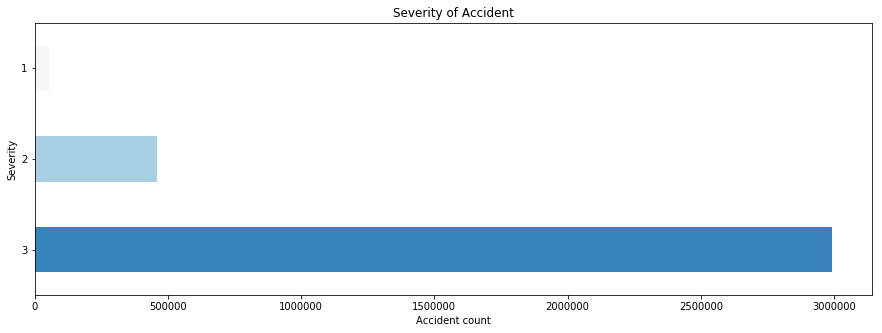

In [237]:
plt.subplots(figsize=(15,5))
AccSeverity = allm['Accident_Severity'].dropna().value_counts()
AccSeverity.plot.barh(color=sns.color_palette('RdBu_r',5))
plt.title('Severity of Accident')
plt.xlabel('Accident count')
plt.ylabel('Severity')
plt.show()

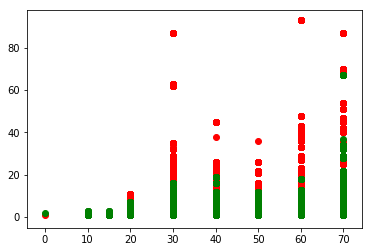

In [238]:
plt.scatter(x= allm['Speed_limit'], y= allm['Number_of_Casualties'],  c='red')
plt.scatter(x= allm['Speed_limit'], y= allm['Number_of_Vehicles'], c='green')
plt.show()

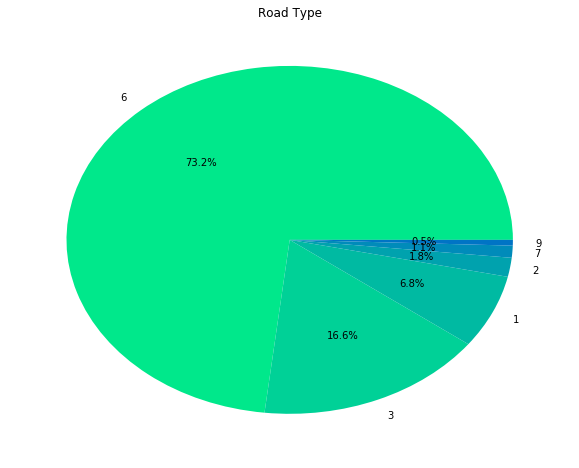

In [239]:
plt.subplots(figsize=(10,8))
PArrive=allm['Road_Type'].dropna().value_counts()
PArrive.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('winter_r',10))
plt.ylabel('')
plt.title('Road Type')
plt.show()

ValueError: num must be 1 <= num <= 2, not 3

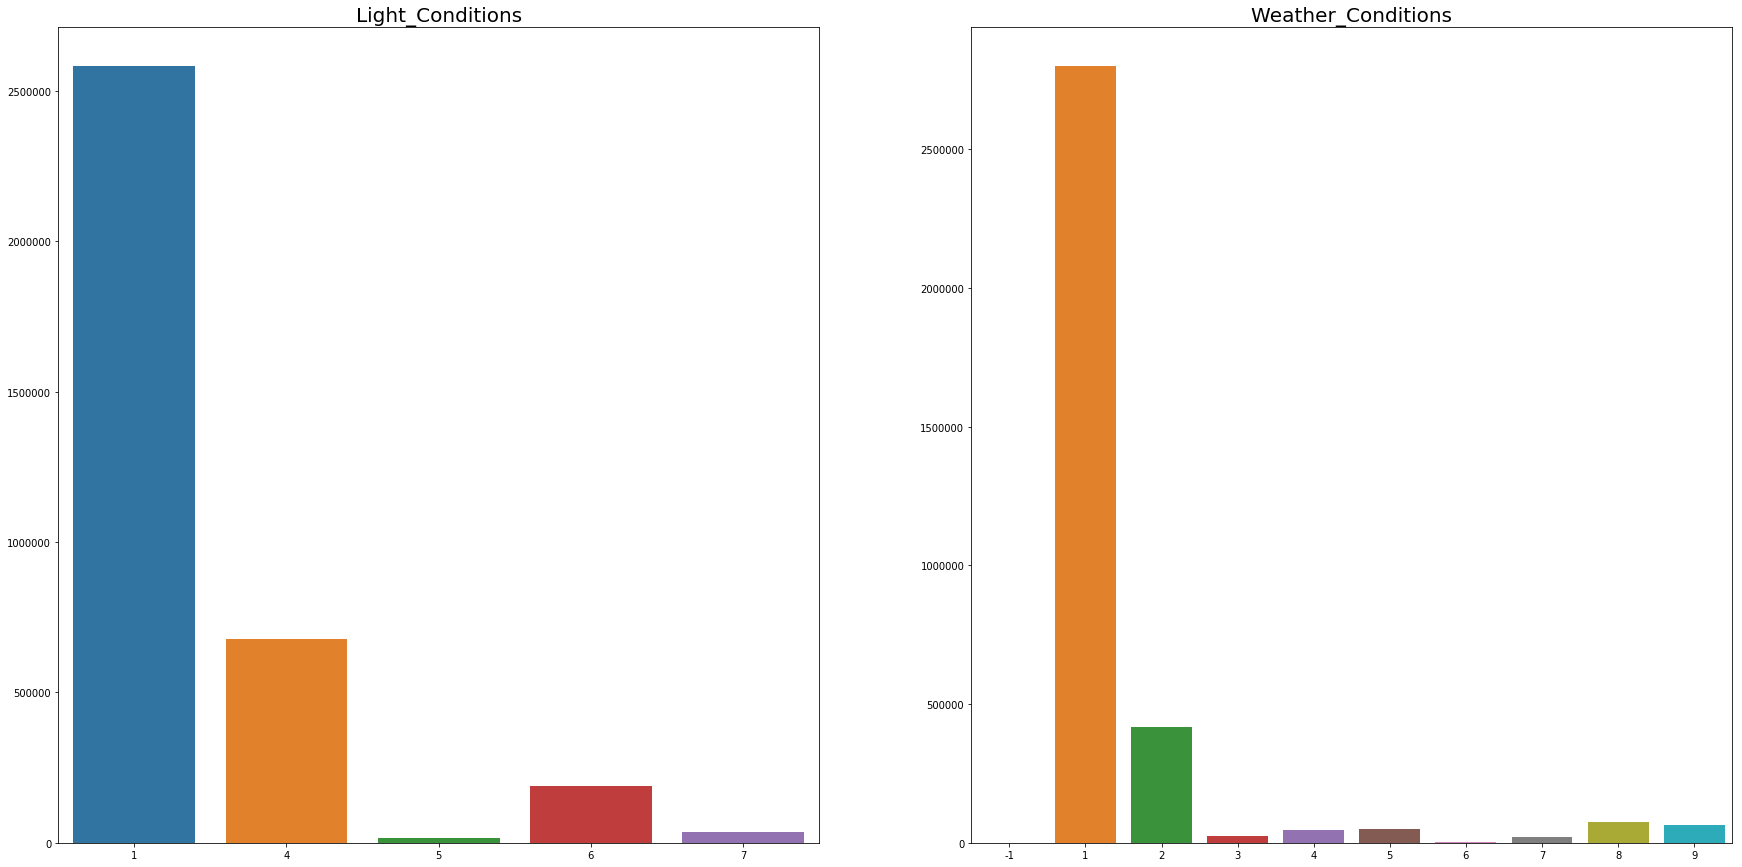

In [242]:
import itertools
Vcondition=['Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions']
plt.subplots(figsize=(30,15))
length=len(Vcondition)
for i,j in itertools.zip_longest(Vcondition,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=allm)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

In [117]:
df ['Accident_Severity'] = df ['Accident_Severity'].replace('1','2')

In [122]:
df['Serious'] = np.where(df['Accident_Severity'] < 2, 1, 0)

In [126]:
df['Slight'] = np.where(df['Accident_Severity'] < 3, 2, 0)

In [127]:
acc['Serious'] = np.where(df['Accident_Severity'] < 2, 1, 0)

ValueError: Length of values does not match length of index

In [130]:
df['Slight'] = np.where(df['Accident_Severity'] < 3,  2)

ValueError: either both or neither of x and y should be given

In [129]:
acc['Slight'].mean()

0.1488656127836249

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/moyo.akala/Downloads/merged_dataset.csv')

#combine fatal and serious and assign to class 0
df['Accident_Severity'] = df['Accident_Severity'].replace([1,2],0)

#class 1 is slight
df['Accident_Severity'] = df['Accident_Severity'].replace([3],1)

np.unique(df['Accident_Severity'], return_counts=True)

df_2 = df.drop(['Unnamed: 0','Accident_Index','Date','Time'], axis=1)

#this isnt a optimal solution but lets just drop null values for now
df_2 = df_2.dropna()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import minmax_scale


logreg = LogisticRegression()
normalized_df = minmax_scale(df_2.drop(['Accident_Severity'], axis = 1))
X = normalized_df
Y = df_2[['Accident_Severity']]
Y = Y.values
data, Label = shuffle(X, Y1, random_state=2)
train_data = [data, Label]
(x, y) = (train_data[0], train_data[1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4)
logreg.fit(x_train,y_train)
pred_log = logreg.predict(x_test)
accuracy = accuracy_score(pred_log,y_test)
print('Accuracy_LogReg:', accuracy_score(y_test, pred_log))

rndforest = RandomForestClassifier()
rndforest.fit(x_train,y_train)
pred_rnd = rndforest.predict(x_test)
print('Accuracy_RandomForest:', accuracy_score(y_test, pred_rnd))

##try feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

##take 20 features with highest kscore
X_new = SelectKBest(chi2, k= 20).fit_transform(normalized_df,Y.values)

##assign new X
X = X_new
data, Label = shuffle(X, Y1, random_state=2)
train_data = [data, Label]
(x, y) = (train_data[0], train_data[1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4)
logreg.fit(x_train,y_train)
pred_log = logreg.predict(x_test)
accuracy = accuracy_score(pred_log,y_test)
print('Accuracy_LogReg_After_FeatSel:', accuracy_score(y_test, pred_log))

rndforest = RandomForestClassifier()
rndforest.fit(x_train,y_train)
pred_rnd = rndforest.predict(x_test)
print('Accuracy_RandomForest_After_FeatSel:', accuracy_score(y_test, pred_rnd))

##calculate precision
##for imbalanced datasets, this metric is more preferred to accuracy as because
##it helps you identify how well your model predicts the class with the least number of
##observations or outliers. In cases like fraud, this is very important.
from sklearn.metrics import precision_score
print('Log_reg_precision:', precision_score(y_test,pred_log))
print('Log_reg_precision:', precision_score(y_test,pred_rnd))


###get confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt

class_names = ['Serious/Fatal', 'Slight']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, pred_log)
cnf_matrix2 = confusion_matrix(y_test, pred_rnd)

##from the confusion matrices of both algorithms, RndForest has a better predictive accuracy on
##the serious/fatal class which makes it more effective in identifying the class
##with the least number of observations.
##Due to the imbalance of the dataset, a higher precision rate is required. Random Forest Calssifier again
##has the advantage
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix_LogReg')
plt.show
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=class_names,title='Confusion matrix_RndForest')
plt.show()

##CORRELATION MATRIX
##this shows the relationship between features. The colors signify how strongly each correlate with one another.
##the deeper the color, the higher the correlation.
import seaborn as sns
corr = df_2.corr()
##plot correlation
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


##PARAMETER TUNING FOR RANDOM FOREST
#use a cross validation fold of 3
#search through the best paramters
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [10,30],
#     'max_features': ['auto','log2']
# }
# CV_rfc = GridSearchCV(estimator= rndforest , param_grid=param_grid, cv= 3)
# CV_rfc.fit(X=x_train, y=y_train)
# print (CV_rfc.best_params_)

##REGRESSION FOR CLASSIFICATION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
X = normalized_df
Y = df_2[['Accident_Severity']]
Y = Y.values
data, Label = shuffle(X, Y, random_state=2)
train_data = [data, Label]
(x, y) = (train_data[0], train_data[1])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4)
linreg.fit(x_train,y_train)
pred_linreg = linreg.predict(x_test)
print('Error_LinReg:', mean_squared_error(y_test, pred_log))
##an error 0.04 seems good but its not appropriate in judging how well the model performed in classifying
##slight accident cases for instance.